<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#LLMGAG" data-toc-modified-id="LLMGAG-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>LLMGAG</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Run" data-toc-modified-id="Run-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Run</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Number-of-genes-assembled-&amp;-clustered" data-toc-modified-id="Number-of-genes-assembled-&amp;-clustered-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Number of genes assembled &amp; clustered</a></span></li><li><span><a href="#Taxonomy" data-toc-modified-id="Taxonomy-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Taxonomy</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Annotations" data-toc-modified-id="Annotations-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Annotations</a></span><ul class="toc-item"><li><span><a href="#COG-functional-categories" data-toc-modified-id="COG-functional-categories-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>COG functional categories</a></span></li><li><span><a href="#Grouped-by-taxonomy" data-toc-modified-id="Grouped-by-taxonomy-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Grouped by taxonomy</a></span></li></ul></li><li><span><a href="#humann2-db-genes" data-toc-modified-id="humann2-db-genes-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>humann2 db genes</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#By-taxonomy" data-toc-modified-id="By-taxonomy-5.4.1.1"><span class="toc-item-num">5.4.1.1&nbsp;&nbsp;</span>By taxonomy</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Run `LLMGAG` (metagenome assembly of genes) pipeline on animal gut microbiome metagenome study
* study = PRJEB20308
  * host = dog

# Var

In [2]:
studyID = 'PRJEB20308'
base_dir = file.path('/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/',
                     studyID)
tmp_out_dir = file.path('/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl/',
                        studyID)

work_dir = file.path(base_dir, 'LLMGAG')

pipeline_dir = '/ebio/abt3_projects/Georg_animal_feces/bin/llmgag/'
threads = 24

# Init

In [3]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
set.seed(8304)

source('/ebio/abt3_projects/Georg_animal_feces/code/misc_r_functions/init.R')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last



In [4]:
make_dir(base_dir)
make_dir(tmp_out_dir)
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects//PRJEB20308 
Directory already exists: /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB20308 
Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects//PRJEB20308/LLMGAG 


# LLMGAG

## Setup

In [8]:
cat_file(file.path(work_dir, 'config.yaml'))

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl/PRJEB20308/LLMGA/samples_n100.txt

# output location
output_dir: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/PRJEB20308/LLMGAG/

#-- database --#
## eggnog mapper
eggnog_diamond_db: /ebio/abt3_projects/databases_no-backup/Eggnog/eggnog_proteins.dmnd
eggnog_db: /ebio/abt3_projects/databases_no-backup/Eggnog/eggnog.db
eggnog_og2lev_db: /ebio/abt3_projects/databases_no-backup/Eggnog/og2level.tsv.gz
## mmseqs taxonomy
mmseqs_tax_db: /ebio/abt3_projects/databases_no-backup/uniclust/uniclust50/uniclust50_2018_08_consensus
## checkM
checkM_data: /ebio/abt3_projects/databases_no-backup/checkM/
## sourmash
sourmash_db: /ebio/abt3_projects/databases_no-backup/sourmash/genbank-k31.sbt.json
sourmash_lca_db: /ebio/abt3_projects/databases_no-backup/sourmash/genbank-k31.lca.json.gz
# humann2 diamond
humann2_diamo

### Run

```{bash}
(snakemake_dev) @ rick:/ebio/abt3_projects/Georg_animal_feces/bin/llmgag
$ screen -L -S llmgag-PRJEB20308 ./snakemake_sge.sh /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/PRJEB20308/LLMGAG/config.yaml cluster.json /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/PRJEB20308/LLMGAG/SGE_log 24
```

In [9]:
pipelineInfo(pipeline_dir)

LLMGAG

Ley Lab Metagenome Assembly of Genes (LLMGAG)

* Version: 0.1.3
* Authors:
  * Nick Youngblut <nyoungb2@gmail.com>
* Maintainers:
  * Nick Youngblut <nyoungb2@gmail.com>

--- conda envs ---
==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgag//bin/envs/annotate.yaml <==
channels: !!python/tuple
- bioconda
dependencies:
- pigz
- bioconda::fasta-splitter
- bioconda::eggnog-mapper

==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgag//bin/envs/checkm.yaml <==
channels: !!python/tuple
- bioconda
dependencies:
- python=2
- pigz
- bioconda::prodigal
- bioconda::pplacer
- bioconda::checkm-genome

==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgag//bin/envs/das_tool.yaml <==
channels: !!python/tuple
- r
- bioconda
dependencies:
- pigz
- ruby
- r::r-base
- r::r-data.table
- r::r-domc
- r::r-ggplot2
- bioconda::pullseq
- bioconda::prodigal
- bioconda::blast
- bioconda::diamond
==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgag//bin/envs/dask.yaml <==
channels: !!python/tuple
- co

# Summary

## Number of genes assembled & clustered

In [5]:
F = file.path(work_dir, 'assembly', 'plass', 'genes.faa')
cmd = glue::glue('grep -c ">" {fasta}', fasta=F)
n_raw_seqs = system(cmd, intern=TRUE)
cat('Number of assembled sequences:', n_raw_seqs, '\n')

Number of assembled sequences: 358941475 


In [6]:
F = file.path(work_dir, 'cluster', 'linclust', 'clusters_rep-seqs.faa')
cmd = glue::glue('grep -c ">" {fasta}', fasta=F)
n_rep_seqs = system(cmd, intern=TRUE)
cat('Number of cluster rep sequences:', n_rep_seqs, '\n')

Number of cluster rep sequences: 128248670 


In [7]:
F = file.path(work_dir, 'humann2_db', 'clusters_rep-seqs.faa.gz')
cmd = glue::glue('gunzip -c {fasta} | grep -c ">"', fasta=F)
n_h2_seqs = system(cmd, intern=TRUE)
cat('Number of humann2_db-formatted seqs:', n_h2_seqs, '\n')

Number of humann2_db-formatted seqs: 25411395 


## Taxonomy

In [ ]:
# reading in taxonomy table
## WARING: slow
F = file.path(work_dir, 'taxonomy', 'clusters_rep-seqs_tax_db.tsv.gz')
cmd = glue::glue('gunzip -c {file}', file=F) 
coln = c('seqID', 'taxID', 'rank', 'spp', 'lineage')
levs = c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')
tax = fread(cmd, sep='\t', header=FALSE, col.names=coln, fill=TRUE) %>%
    separate(lineage, levs, sep=':')
tax %>% dfhead

In [26]:
# number of sequences
tax$seqID %>% unique %>% length %>% print

[1] 128248670


In [27]:
# which ranks found?
tax$rank %>% table %>% print

.
           class           cohort           family            forma 
           57660                4            76162              260 
           genus       infraclass          kingdom          no rank 
          113345                8               78         52156862 
           order           phylum          species    species group 
          251818           251295         74721562              106 
species subgroup         subclass        subfamily         subgenus 
              44               13              162               41 
      subkingdom         suborder        subphylum       subspecies 
              35               15              169           402008 
        subtribe      superfamily     superkingdom       superorder 
              19                2           216424               12 
           tribe         varietas 
               8              558 


In [28]:
# number of classifications per seqID
tax %>%
    group_by(seqID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    .$n %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

### Summary

In [29]:
# summarizing taxonomy
tax_s = tax %>%
    filter(Domain != '',
           Phylum != '') %>%
    group_by(Domain, Phylum) %>%
    summarize(n = seqID %>% unique %>% length) %>%
    ungroup() 
 
tax_s %>% dfhead

[1] 206   3


Domain,Phylum,n
Fungi,Ascomycota,89423
Fungi,Basidiomycota,2182
Fungi,Blastocladiomycota,136


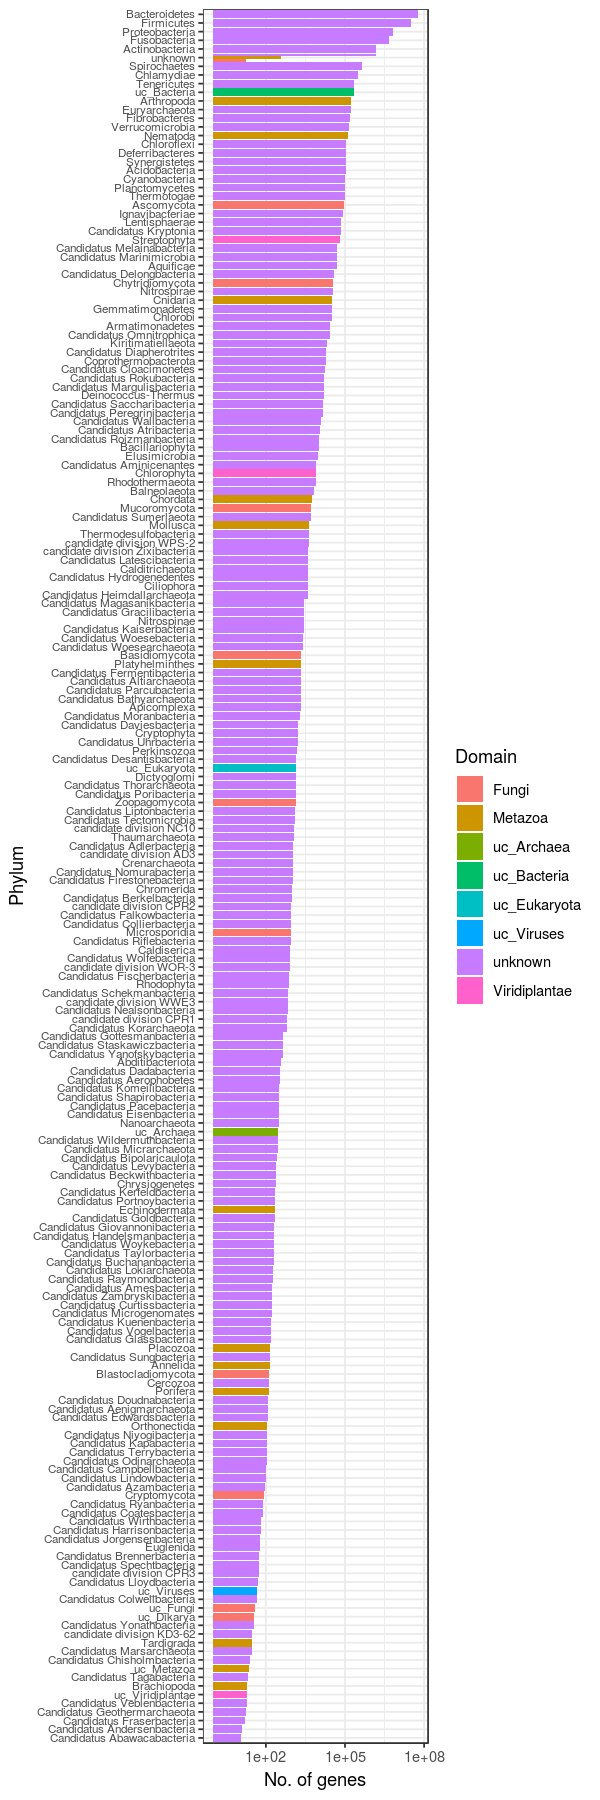

In [30]:
# plotting by phylum
p = tax_s %>%
    filter(n > 10) %>%
    mutate(Phylum = Phylum %>% reorder(n)) %>%
    ggplot(aes(Phylum, n, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    labs(y = 'No. of genes') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7)
    )

dims(5,15)
plot(p)

In [31]:
# top phyla
tax_s %>% 
    arrange(-n) %>%
    head(n=30)

Domain,Phylum,n
unknown,Bacteroidetes,57838618
unknown,Firmicutes,30493420
unknown,Proteobacteria,6581643
unknown,Fusobacteria,4654540
unknown,Actinobacteria,1511866
unknown,unknown,1434989
unknown,Spirochaetes,431201
unknown,Chlamydiae,315641
unknown,Tenericutes,223368
uc_Bacteria,uc_Bacteria,214674


In [32]:
# summarizing taxonomy
tax_s = tax %>%
    filter(Domain != '',
           Phylum != '',
           Class != '') %>%
    group_by(Domain, Phylum, Class) %>%
    summarize(n = seqID %>% unique %>% length) %>%
    ungroup() 
 
tax_s %>% dfhead

[1] 437   4


Domain,Phylum,Class,n
Fungi,Ascomycota,Dothideomycetes,4299
Fungi,Ascomycota,Eurotiomycetes,3760
Fungi,Ascomycota,Lecanoromycetes,5


In [33]:
# top hits
tax_s %>% 
    arrange(-n) %>%
    head(n=30)

Domain,Phylum,Class,n
unknown,Bacteroidetes,Bacteroidia,51919447
unknown,Firmicutes,Clostridia,20101888
unknown,Fusobacteria,Fusobacteriia,4654540
unknown,Firmicutes,Bacilli,4034161
unknown,Proteobacteria,Gammaproteobacteria,2741944
unknown,Proteobacteria,Betaproteobacteria,2559909
unknown,Firmicutes,Erysipelotrichia,2373636
unknown,Bacteroidetes,unknown,2209367
unknown,Firmicutes,Negativicutes,1917071
unknown,Firmicutes,unknown,1688031


## Annotations

In [55]:
# F = file.path(work_dir, 'annotate', 'eggnog-mapper', 'clusters_rep-seqs.emapper.annotations.gz')
# cmd = glue::glue('gunzip -c {file}', file=F, header=FALSE) 
# emap_annot = fread(cmd, sep='\t') %>%
#   dplyr::select(-V6)
# emap_annot %>% dfhead

In [53]:
# eggnog-mapper v2
cols = c(
"query_name",
"seed_eggNOG_ortholog",
"seed_ortholog_evalue",
"seed_ortholog_score",
"Predicted_taxonomic_group",
"Predicted_protein_name",
"Gene_Ontology_terms",
"EC_number",
"KEGG_ko",
"KEGG_Pathway",
"KEGG_Module",
"KEGG_Reaction",
"KEGG_rclass",
"BRITE",
"KEGG_TC",
"CAZy",
"BiGG_Reaction",
"tax_scope__eggNOG_taxonomic_level_used_for_annotation",
"eggNOG_OGs",
"bestOG",
"COG_Functional_Category",
"eggNOG_free_text_description"
)

In [54]:
F = file.path(work_dir, 'annotate', 'eggnog-mapper', 'clusters_rep-seqs.emapper.annotations.gz')
cmd = glue::glue('gunzip -c {file}', file=F, header=FALSE) 
emap_annot = fread(cmd, sep='\t') 
colnames(emap_annot) = cols
emap_annot = emap_annot %>%
    dplyr::select(-Gene_Ontology_terms)
emap_annot %>% dfhead

[1] 52425579       21


query_name,seed_eggNOG_ortholog,seed_ortholog_evalue,seed_ortholog_score,Predicted_taxonomic_group,Predicted_protein_name,EC_number,KEGG_ko,KEGG_Pathway,KEGG_Module,⋯,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,tax_scope__eggNOG_taxonomic_level_used_for_annotation,eggNOG_OGs,bestOG,COG_Functional_Category,eggNOG_free_text_description
a5f485c9924f44099553abd65ad0329f,626522.GCWU000325_00022,3.4e-177,627.9,Alloprevotella,nuoL,1.6.5.3,"ko:K00341,ko:K05577","ko00190,ko01100,map00190,map01100","M00144,M00145",⋯,RC00061,"ko00000,ko00001,ko00002,ko01000",3.D.1,,,Bacteria,"1WD0D@1283313,2FPCT@200643,4NEBM@976,COG1009@1,COG1009@2",NA|NA|NA,CP,"NADH-Ubiquinone oxidoreductase (complex I), chain 5 N-terminus"
91bafa161b1c43c3b15acdb281a4203d,469617.FUAG_02180,7.2e-55,219.9,Fusobacteria,yebR,"1.8.4.14,3.1.3.3","ko:K02584,ko:K07315,ko:K08968","ko00270,ko02020,map00270,map02020",,⋯,RC00639,"ko00000,ko00001,ko01000,ko03000,ko03021",,,,Bacteria,"37AMS@32066,COG1956@1,COG1956@2",NA|NA|NA,T,GAF domain
bcd554abb55641fda34d38779d12c922,537011.PREVCOP_05089,1.6e-38,166.0,Bacteroidia,,,,,,⋯,,,,,,Bacteria,"2FNFE@200643,4NED2@976,COG2373@1,COG2373@2",NA|NA|NA,S,COG2373 Large extracellular alpha-helical protein


In [35]:
# # adding taxonomy info
# intersect(emap_annot$V1, tax$seqID) %>% length %>% print

# emap_annot = emap_annot %>%
#     left_join(tax, c('V1'='seqID'))

# emap_annot %>% dfhead

[1] 52425579
[1] 52425579       31


V1,V2,V3,V4,V5,V7,V8,V9,V10,V11,⋯,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
a5f485c9924f44099553abd65ad0329f,626522.GCWU000325_00022,3.4e-177,627.9,Alloprevotella,"GO:0005575,GO:0005623,GO:0005886,GO:0016020,GO:0044464,GO:0071944",1.6.5.3,"ko:K00341,ko:K05577","ko00190,ko01100,map00190,map01100","M00144,M00145",⋯,575590,no rank,Bacteroidetes oral taxon 274 str. F0058,unknown,Bacteroidetes,unknown,unknown,unknown,unknown,Bacteroidetes oral taxon 274
91bafa161b1c43c3b15acdb281a4203d,469617.FUAG_02180,7.2e-55,219.9,Fusobacteria,"GO:0003674,GO:0003824,GO:0005575,GO:0005622,GO:0005623,GO:0005737,GO:0005829,GO:0008150,GO:0008152,GO:0016491,GO:0016667,GO:0016671,GO:0033745,GO:0044424,GO:0044444,GO:0044464,GO:0055114","1.8.4.14,3.1.3.3","ko:K02584,ko:K07315,ko:K08968","ko00270,ko02020,map00270,map02020",,⋯,180163,species,Cetobacterium ceti,unknown,Fusobacteria,Fusobacteriia,Fusobacteriales,Fusobacteriaceae,Cetobacterium,Cetobacterium ceti
bcd554abb55641fda34d38779d12c922,537011.PREVCOP_05089,1.6e-38,166.0,Bacteroidia,,,,,,⋯,537011,no rank,Prevotella copri DSM 18205,unknown,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,Prevotella copri


In [56]:
# adding taxonomy info
intersect(emap_annot$query_name, tax$seqID) %>% length %>% print

emap_annot = emap_annot %>%
    left_join(tax, c('query_name'='seqID'))

emap_annot %>% dfhead

[1] 52425579
[1] 52425579       31


query_name,seed_eggNOG_ortholog,seed_ortholog_evalue,seed_ortholog_score,Predicted_taxonomic_group,Predicted_protein_name,EC_number,KEGG_ko,KEGG_Pathway,KEGG_Module,⋯,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
a5f485c9924f44099553abd65ad0329f,626522.GCWU000325_00022,3.4e-177,627.9,Alloprevotella,nuoL,1.6.5.3,"ko:K00341,ko:K05577","ko00190,ko01100,map00190,map01100","M00144,M00145",⋯,575590,no rank,Bacteroidetes oral taxon 274 str. F0058,unknown,Bacteroidetes,unknown,unknown,unknown,unknown,Bacteroidetes oral taxon 274
91bafa161b1c43c3b15acdb281a4203d,469617.FUAG_02180,7.2e-55,219.9,Fusobacteria,yebR,"1.8.4.14,3.1.3.3","ko:K02584,ko:K07315,ko:K08968","ko00270,ko02020,map00270,map02020",,⋯,180163,species,Cetobacterium ceti,unknown,Fusobacteria,Fusobacteriia,Fusobacteriales,Fusobacteriaceae,Cetobacterium,Cetobacterium ceti
bcd554abb55641fda34d38779d12c922,537011.PREVCOP_05089,1.6e-38,166.0,Bacteroidia,,,,,,⋯,537011,no rank,Prevotella copri DSM 18205,unknown,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,Prevotella copri


In [57]:
# n_annot_seqs = emap_annot$V1 %>% unique %>% length
# cat('Number of rep seqs with eggnog-mapper annotations:', n_annot_seqs, '\n')

In [58]:
n_annot_seqs = emap_annot$query_name %>% unique %>% length
cat('Number of rep seqs with eggnog-mapper annotations:', n_annot_seqs, '\n')

Number of rep seqs with eggnog-mapper annotations: 52425579 


### COG functional categories

* [wiki on categories](https://ecoliwiki.org/colipedia/index.php/Clusters_of_Orthologous_Groups_%28COGs%29)

In [59]:
# # summarizing by functional group
# emap_annot_s = emap_annot %>%
#     dplyr::select(V1, V12) %>%
#     separate(V12, LETTERS[1:6], sep=', ') %>%
#     gather(X, COG_func_cat, -V1) %>%
#     filter(!is.na(COG_func_cat),
#            COG_func_cat != '') %>%
#     dplyr::select(-X) 

# emap_annot_s %>% dfhead

In [60]:
max_cat = emap_annot$COG_Functional_Category %>% unique %>% sapply(nchar) %>% max

emap_annot_s = emap_annot %>%
    dplyr::select(query_name, COG_Functional_Category) %>%
    separate(COG_Functional_Category, LETTERS[1:max_cat], sep='(?<=[A-Z])') %>%
    gather(X, COG_func_cat, -query_name) %>%
    filter(!is.na(COG_func_cat),
           COG_func_cat != '') %>%
    dplyr::select(-X) 
    
emap_annot_s %>% dfhead

Warning message:
“Expected 5 pieces. Additional pieces discarded in 1 rows [11365889].”Warning message:
“Expected 5 pieces. Missing pieces filled with `NA` in 52423627 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

[1] 53465782        2


query_name,COG_func_cat
a5f485c9924f44099553abd65ad0329f,C
91bafa161b1c43c3b15acdb281a4203d,T
bcd554abb55641fda34d38779d12c922,S


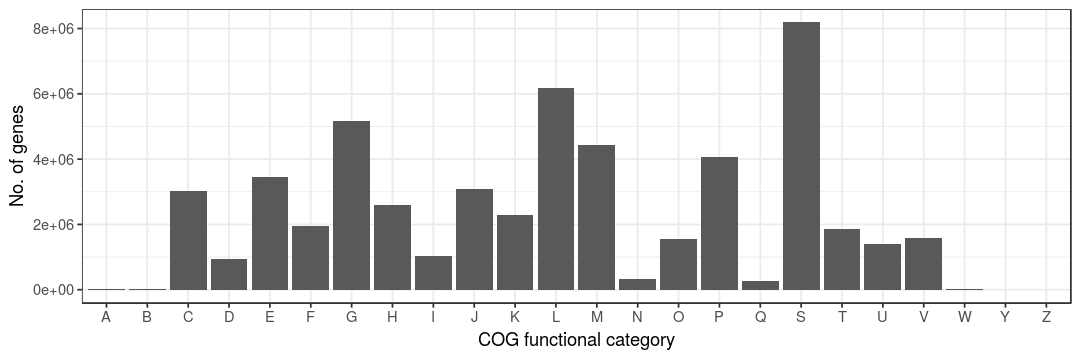

In [61]:
# plotting summary
p = emap_annot_s %>%
    ggplot(aes(COG_func_cat)) +
    geom_bar() +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(9,3)
plot(p)

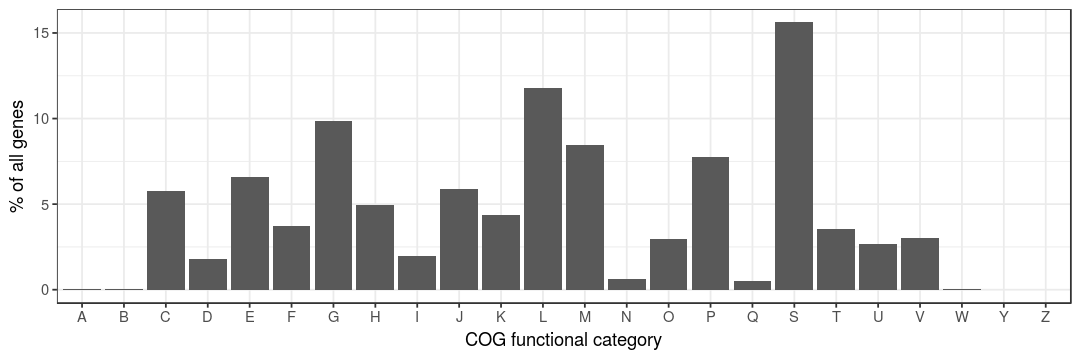

In [62]:
# plotting summary
p = emap_annot_s %>%
    group_by(COG_func_cat) %>%
    summarize(perc_abund = n() / n_annot_seqs * 100) %>%
    ungroup() %>%
    ggplot(aes(COG_func_cat, perc_abund)) +
    geom_bar(stat='identity') +
    labs(x='COG functional category', y='% of all genes') +
    theme_bw() 

dims(9,3)
plot(p)

### Grouped by taxonomy

In [63]:
# emap_annot_s = emap_annot %>%
#     dplyr::select(V1, V12) %>%
#     separate(V12, LETTERS[1:6], sep=', ') %>%
#     gather(X, COG_func_cat, -V1) %>%
#     left_join(tax, c('V1'='seqID')) %>%
#     filter(!is.na(COG_func_cat),
#            COG_func_cat != '') %>%
#     dplyr::select(-X) 

# emap_annot_s %>% dfhead

In [64]:
max_cat = emap_annot$COG_Functional_Category %>% unique %>% sapply(nchar) %>% max

emap_annot_s = emap_annot %>%
    dplyr::select(query_name, COG_Functional_Category) %>%
    separate(COG_Functional_Category, LETTERS[1:max_cat], sep='(?<=[A-Z])') %>%
    gather(X, COG_func_cat, -query_name) %>%
    left_join(tax, c('query_name'='seqID')) %>%
    filter(!is.na(COG_func_cat),
           COG_func_cat != '') %>%
    dplyr::select(-X) 

emap_annot_s %>% dfhead

Warning message:
“Expected 5 pieces. Additional pieces discarded in 1 rows [11365889].”Warning message:
“Expected 5 pieces. Missing pieces filled with `NA` in 52423627 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

[1] 53465782       12


query_name,COG_func_cat,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
a5f485c9924f44099553abd65ad0329f,C,575590,no rank,Bacteroidetes oral taxon 274 str. F0058,unknown,Bacteroidetes,unknown,unknown,unknown,unknown,Bacteroidetes oral taxon 274
91bafa161b1c43c3b15acdb281a4203d,T,180163,species,Cetobacterium ceti,unknown,Fusobacteria,Fusobacteriia,Fusobacteriales,Fusobacteriaceae,Cetobacterium,Cetobacterium ceti
bcd554abb55641fda34d38779d12c922,S,537011,no rank,Prevotella copri DSM 18205,unknown,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,Prevotella copri


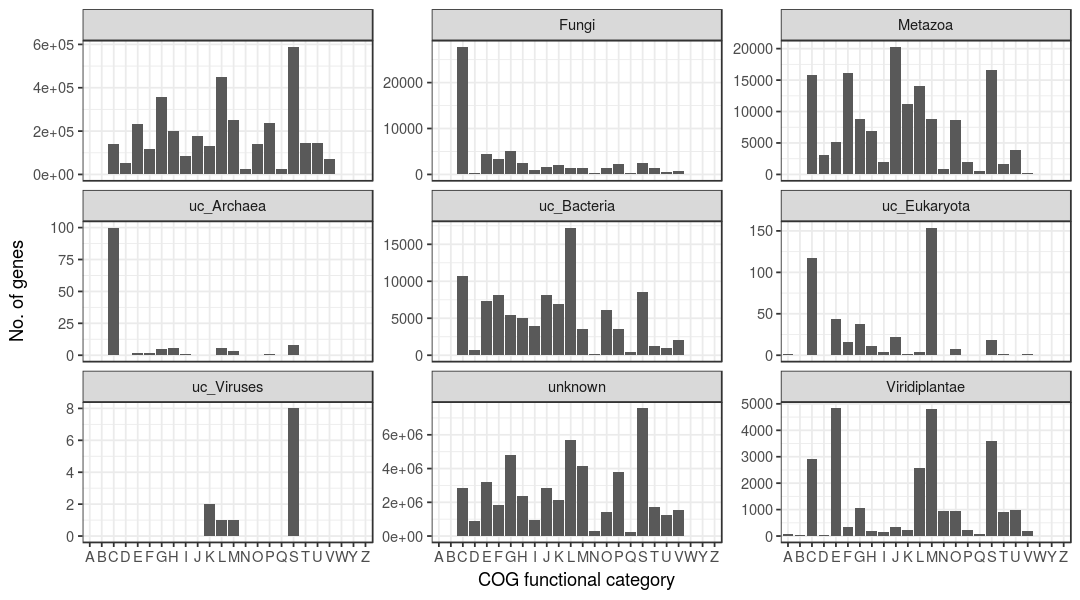

In [65]:
# plotting summary by domain
p = emap_annot_s %>%
    ggplot(aes(COG_func_cat)) +
    geom_bar() +
    facet_wrap(~ Domain, scales='free_y') +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(9,5)
plot(p)

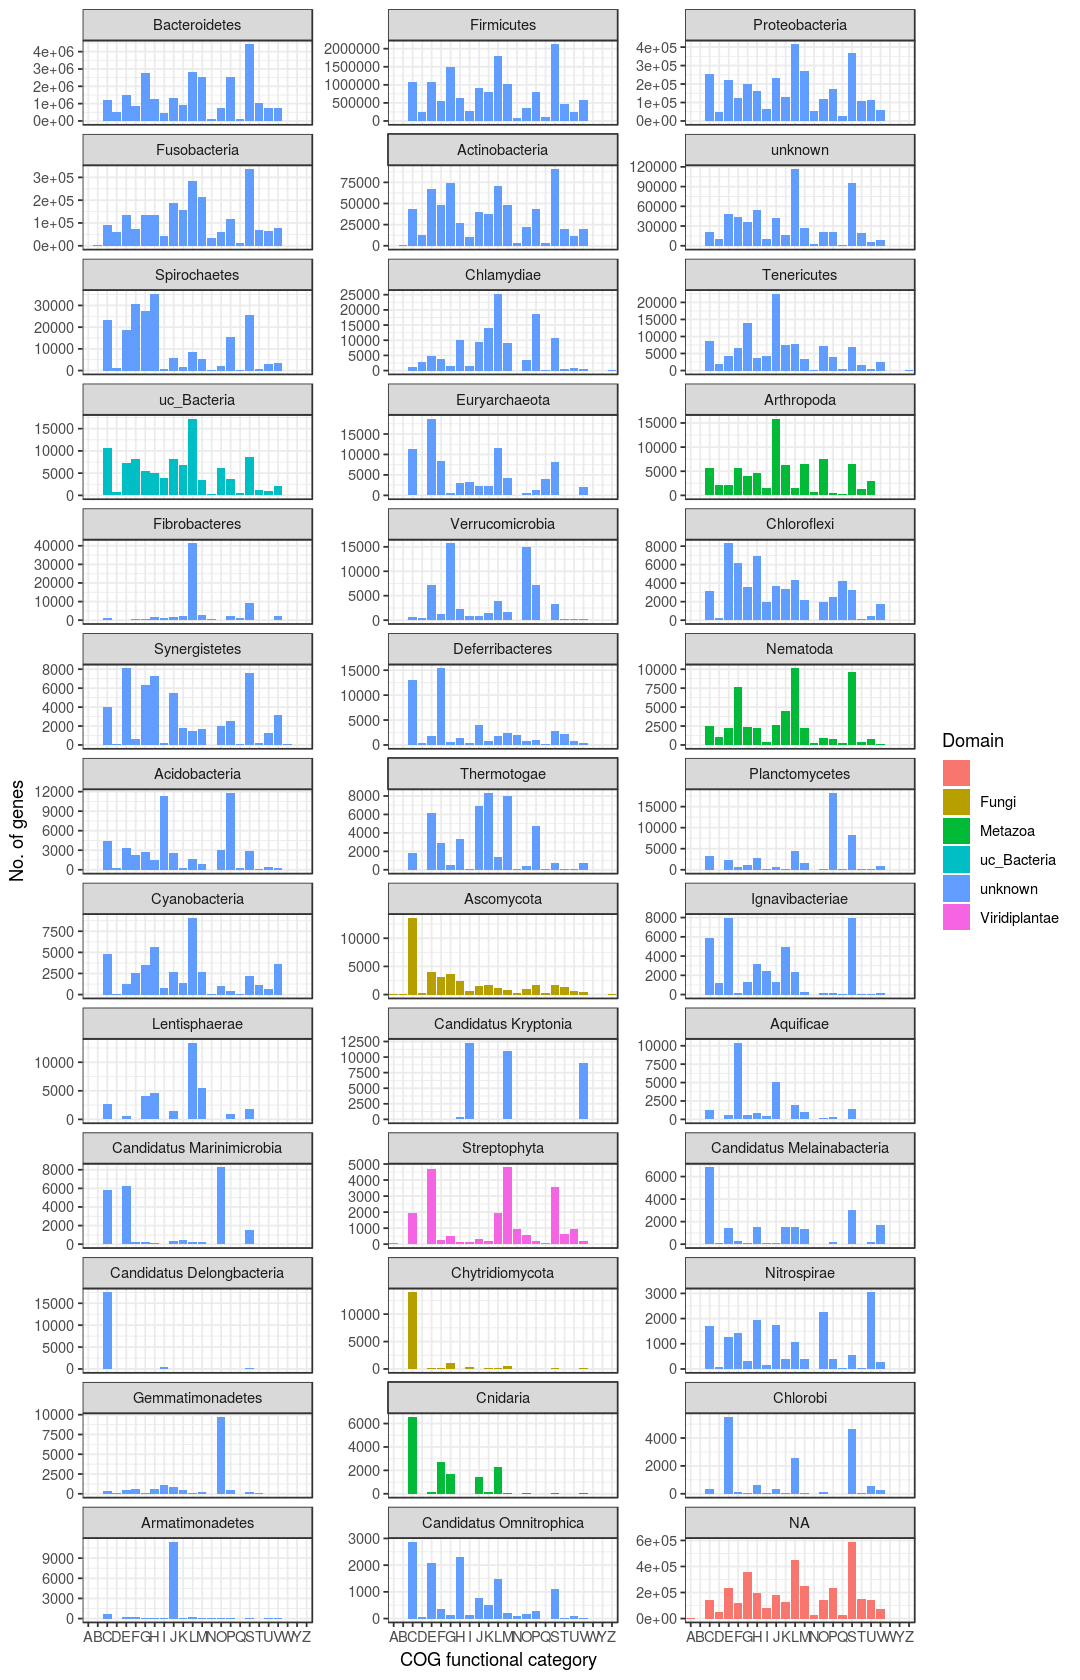

In [67]:
# plotting summary by phylum
p = emap_annot_s %>%
    group_by(Phylum) %>%
    mutate(n = n()) %>%
    ungroup() %>%
    filter(n >= 10000) %>%
    mutate(Phylum = Phylum %>% reorder(-n)) %>%
    ggplot(aes(COG_func_cat, fill=Domain)) +
    geom_bar() +
    facet_wrap(~ Phylum, scales='free_y', ncol=3) +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(9,14)
plot(p)

## humann2 db genes

In [43]:
# gene IDs
F = file.path(work_dir, 'humann2_db', 'clusters_rep-seqs_annot-index.tsv')

hm2 = fread(F, sep='\t', header=TRUE) %>%
    separate(new_name, c('UniRefID', 'Gene_length', 'Taxonomy'), sep='\\|') %>%
    separate(Taxonomy, c('Genus', 'Species'), sep='\\.s__') %>%
    separate(Species, c('Species', 'TaxID'), sep='__taxID') %>%
    mutate(Genus = gsub('^g__', '', Genus))

hm2 %>% dfhead

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 1494279 rows [56, 59, 75, 101, 112, 132, 156, 171, 184, 193, 207, 223, 242, 258, 261, 262, 263, 275, 276, 299, ...].”

[1] 25411395        6


original_name,UniRefID,Gene_length,Genus,Species,TaxID
d7438c3c512447a3adfd104be75fbbee,UniRef50_R6WP30,142,Eubacterium,Eubacterium_sp_An3,1965628
b86e9cd6188445009d7d55f0159c6f23,UniRef50_R6V0Z5,271,Collinsella,uncultured_Collinsella_sp_,165190
911e037d3623460f84afb58972b32a62,UniRef50_R5PEY4,125,Prevotella,Prevotella_sp_CAG_732,1262934


In [44]:
# adding taxonomy
intersect(hm2$original_name, tax$seqID) %>% length %>% print

hm2 = hm2 %>%
    left_join(tax, c('original_name'='seqID'))

hm2 %>% dfhead

[1] 25411395
[1] 25411395       16


original_name,UniRefID,Gene_length,Genus.x,Species.x,TaxID,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus.y,Species.y
d7438c3c512447a3adfd104be75fbbee,UniRef50_R6WP30,142,Eubacterium,Eubacterium_sp_An3,1965628,1965628,species,Eubacterium sp. An3,unknown,Firmicutes,Clostridia,Clostridiales,Eubacteriaceae,Eubacterium,Eubacterium sp. An3
b86e9cd6188445009d7d55f0159c6f23,UniRef50_R6V0Z5,271,Collinsella,uncultured_Collinsella_sp_,165190,165190,species,uncultured Collinsella sp.,unknown,Actinobacteria,Coriobacteriia,Coriobacteriales,Coriobacteriaceae,Collinsella,uncultured Collinsella sp.
911e037d3623460f84afb58972b32a62,UniRef50_R5PEY4,125,Prevotella,Prevotella_sp_CAG_732,1262934,1262934,species,Prevotella sp. CAG:732,unknown,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,Prevotella sp. CAG


### Summary

In [45]:
# number of unique UniRef IDs
hm2$UniRefID %>% unique %>% length

[1] 345096

In [46]:
# duplicate UniRef IDs
hm2 %>%
    group_by(UniRefID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    filter(n > 1) %>%
    arrange(-n) %>%
    head(n=30)

UniRefID,n
UniRef50_R5SAJ6,9926
UniRef50_R6YUP4,8847
UniRef50_J9GJH2,7916
UniRef50_W4PGJ5,7891
UniRef50_R5NSN2,7800
UniRef50_R6HKQ6,7321
UniRef50_E3YX49,7176
UniRef50_L8DWL8,7075
UniRef50_J9GHM4,6839
UniRef50_A5ZLI4,6762


In [47]:
# number of genes with a taxID
hm2_f = hm2 %>%
    filter(!is.na(TaxID))

hm2_f %>% nrow 

[1] 23917116

#### By taxonomy

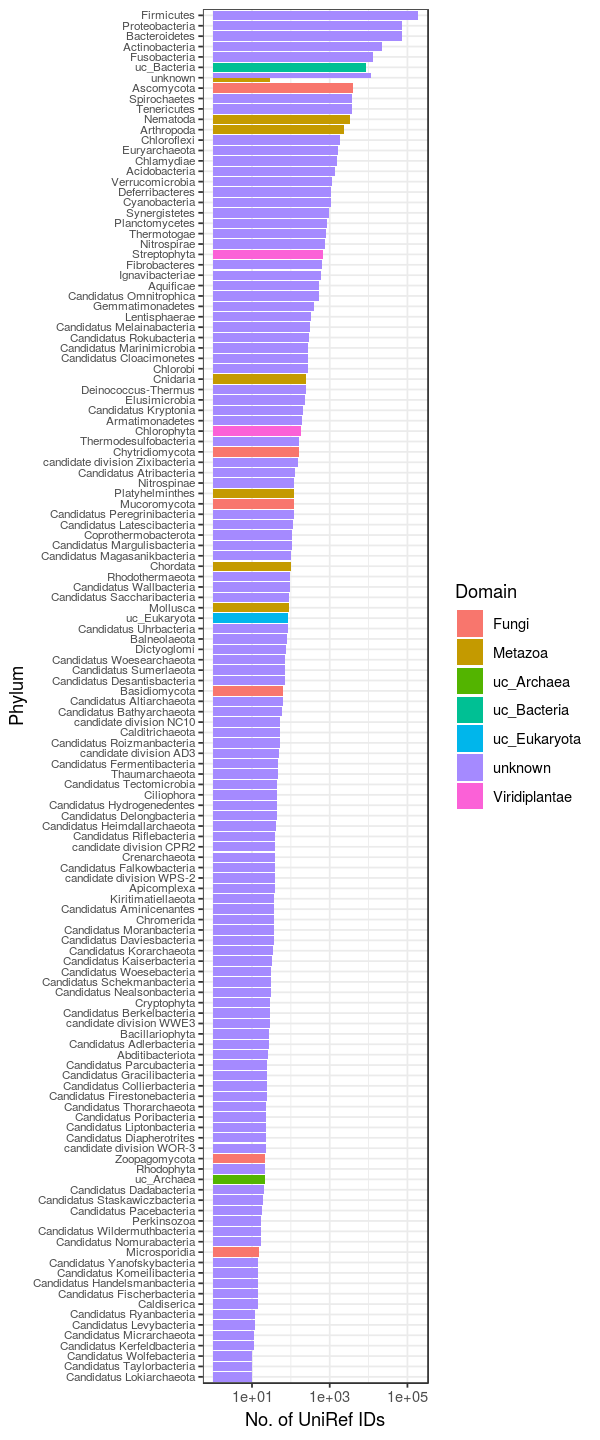

In [68]:
# number of UniRefIDs
hm2_f_s = hm2_f %>%
    group_by(Domain, Phylum) %>%
    summarize(n = UniRefID %>% unique %>% length) %>%
    ungroup()

p = hm2_f_s %>%
    filter(n >= 10) %>%
    mutate(Phylum = Phylum %>% reorder(n)) %>%
    ggplot(aes(Phylum, n, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    coord_flip() +
    labs(y='No. of UniRef IDs') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7)
    )
    
dims(5,12)
plot(p)

# sessionInfo

In [69]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2.2    data.table_1.11.4 ggplot2_3.0.0     tidyr_0.8.1      
[5] dplyr_0.7.6      

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17     pillar_1.2.2     compiler_3.4.1   plyr_1.8.4      
 [5] bindr_0.1.1      base64enc_0.1-3  tools_3.4.1      digest_0.6.15   
 [9] uuid_0.1-2       jsonlite_1.5     evaluate_0.10.1  tibble_1.4.2    
[13] gtable_0.2.0     pkgconfig_2.0.1  rlang_0.2.1      IRdisplay_0.4.4 
[17] IRkernel_0.8.12  repr_0.15.0      withr_2.1.1      stringr_1.3.1   
[21] grid_3.4.1       tidyselec